In [1]:
#############################################################
# Linear SVM Classifier (for linearly separable data)
#############################################################
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn .svm import LinearSVC

iris = datasets.load_iris()
X = iris.data[:, (2,3)]                         # petal length, petal width
y = (iris.target == 2).astype(np.float64)       # Iris-Virginica
# use LinearSVC()
# alternative SVC(kernel='linear', C=1) is much slower for large training set
# or, SGDClassifier(loss='hinge', alpha=1/(m*C)) applies regular SGD to train linear SVM classifier, useful
# for huge datasets that do not fit in memory
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_SVC', LinearSVC(C=1, loss='hinge'))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_SVC', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5, 1.7]])                   # petal length=5.5, petal width=1.7

array([1.])

In [3]:
############################################################################
# nonlinear SVM Cassifier (for nonlinearly separable data, almost default)
############################################################################
# adding polynomial features can make data linearly separable in extended feature space
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

# LinearSVC regularizes bias term => center training data by subtracting mean first
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),               # StandardScaler() centers and scales data
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

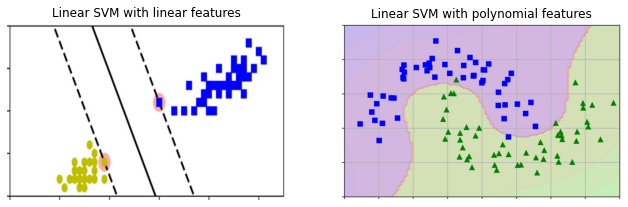

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,4))
img = mpimg.imread('SVM_example.png')
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Linear SVM with linear features')

# Decision Boundary with 2 features
img = mpimg.imread('polynomial_svms.png')
ax[1].imshow(img)
ax[1].axis('off')
ax[1].set_title('Linear SVM with polynomial features')
plt.show()

In [5]:
##############################################################
# SVM Classifier with polynomial kernel
##############################################################
# => Linear SVC with added polynomial features is slow for complex datasets that require high polynomial degree
# => SVM with polynomial kernel to rescue
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))     # hyperparameter coef0 regularizes higher-degree polynomials
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

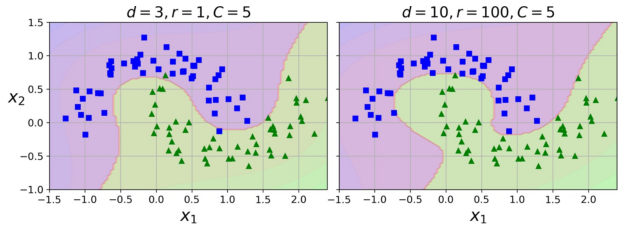

In [6]:
# data separation for different polynomial degrees ('r' same as coef0)
img = mpimg.imread('kernel_trick.png')
plt.figure(figsize=(11,4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
#################################################################
# SVM Classifier with Gaussian RBF (Radial Basis Function) kernel
#################################################################
# => adding similarity features (via adding 'landmark' instances) to datasets to make them linearly separable
# => downside is extra features may make training set unmanageably large
# => m X n dataset gets transformed into m X m data => feature set as large as number of instances
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))    # regularization hyperparameter 'gamma' (lower if overfitting and vice versa, same as C)
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

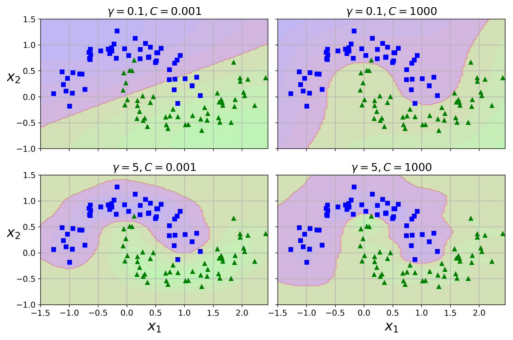

In [8]:
# Data separation with different gamma and C
img = mpimg.imread('training_rbfs.png')
plt.figure(figsize=(11,6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
#########################################################
# Computational Complexity
#########################################################
# LinearSVC() scales almost linearly with number m of training instances => training time complexity ~O(m X n)
# SVC() with kernel='poly' or 'rbf' has training time complexity ~O(m^2 X n) to O(m^3 X n) -> scales badly with m but well with n (# features)

# As a rule of thumb, try linear kernel first (LinearSVC() instead of SVC(kernel='linear')), especially if training set is very large
# or has large feature set. If training set is not too large, try Gaussian RBF too, works well in most cases. Explore Grid search to tune
# hyperparameters.

In [10]:
#############################################################
# SVM Regression
#############################################################
# linear SVM
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)    # hyperparameter epsilon controls *street width* (largest possible margin between two classes in SVM Classifier)
svm_reg.fit(X, y)

# nonlinear SVM
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [11]:
#####################################################################################################
# Exercise #1:
# => Train LinearSVC, SVC and SGDClassifier on a linearly separable dataset
# => Compare model accuracies and decision boundaries
#####################################################################################################
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

# generate linearly separable data
d1 = np.concatenate((np.random.normal(loc=6, scale=1, size=(500, 2)), np.ones((500, 1))), axis=1)
d2 = np.concatenate((np.random.normal(loc=3, scale=1, size=(500, 2)), np.zeros((500, 1))), axis=1)
# combine and shuffle data
d = np.concatenate((d1, d2), axis=0)
np.random.shuffle(d)
d1.shape, d2.shape, d.shape

((500, 3), (500, 3), (1000, 3))

In [12]:
# train models
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(d[:, :2], d[:, 2:], test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 1), (200, 1))

In [13]:
# first LinearSVC()
model = LinearSVC()
model.fit(X_train, y_train.ravel())         # function ravel() converts a vertical numpy array to a horizontal numpy array
model.score(X_test, y_test)

1.0

In [14]:
# next SVC() => constrained to approximate the linear classifier
svc_clf = SVC(kernel='linear', C=99., degree=1, gamma='auto')
svc_clf.fit(X_train, y_train.ravel())
svc_clf.score(X_test, y_test)

1.0

In [15]:
# next SGDClassifier()
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train.ravel())
sgd_clf.score(X_test, y_test)

1.0

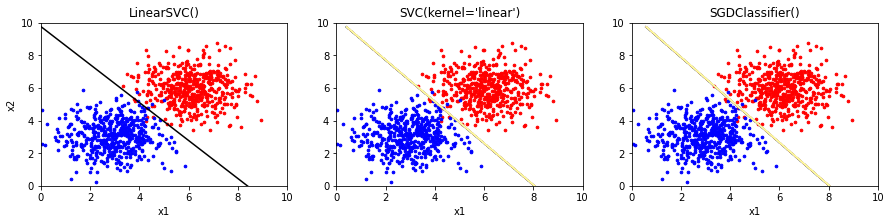

In [16]:
# plot decision boundaries of the three models
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))

# plot decision boundary for LinearSVC()
# first, points
ax[0].scatter(d1[:,0], d1[:,1], c='red', s=7)
ax[0].scatter(d2[:,0], d2[:,1], c='blue', s=7)
# next, decision boundary (intersection of decision function h=w1*x1+w2*x2+b and horizontal plane h=0)
w = model.coef_[0]
b = model.intercept_[0]
xx = np.linspace(0, 10)
yy = -(w[0]*xx + b) / w[1]      # follows from w1*x1 + w2*x2 + b = 0 with xx=x1 and yy=x2
ax[0].plot(xx, yy, 'k-')
# next, misc
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('LinearSVC()')
ax[0].set_xlim(0, 10)
ax[0].set_ylim(0, 10)

# plot decision boundary for SVC()
# first, points
ax[1].scatter(d1[:,0], d1[:,1], c='red', s=7)
ax[1].scatter(d2[:,0], d2[:,1], c='blue', s=7)
# next, decision boundary
h = 0.02
x_min, x_max = d[:,0].min() - 1, d[:,0].max() + 1
y_min, y_max = d[:,1].min() - 1, d[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc_clf.predict(np.c_[xx.ravel(), yy.ravel()])      # decision function
Z = Z.reshape(xx.shape)
ax[1].contour(xx, yy, Z, cmap=plt.cm.Paired)            # decision boundary (cross-section => contour)
# next, misc
ax[1].set_xlabel('x1')
#ax[1].set_ylabel('x2')
ax[1].set_title('SVC(kernel=\'linear\')')
ax[1].set_xlim(0, 10)
ax[1].set_ylim(0, 10)

# plot decision boundary for SGDClassifier()
# first, points
ax[2].scatter(d1[:,0], d1[:,1], c='red', s=7)
ax[2].scatter(d2[:,0], d2[:,1], c='blue', s=7)
# next, decision boundary
Z = sgd_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[2].contour(xx, yy, Z, cmap=plt.cm.Paired)
# next, misc
ax[2].set_xlabel('x1')
#ax[2].set_ylabel('x2')
ax[2].set_title('SGDClassifier()')
ax[2].set_xlim(0, 10)
ax[2].set_ylim(0, 10)

plt.show()

In [17]:
#######################################################################################################
# Exercise #2:
# => Train SVM Classifier on MNIST dataset (strictly binary ->use OvR method to classify all 10 digits)
# => Tune hyper-parameters using small validation sets to speed up process
# => Show accuracy you can reach
#######################################################################################################
from sklearn import datasets
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46900, 784), (23100, 784), (46900,), (23100,))

In [18]:
# cross-validation to optimize hyper-parameters
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
clf = OneVsRestClassifier(estimator=SVC(gamma='auto'))
scores = cross_val_score(estimator=clf, X=X_train[:1000]/255., y=y_train[:1000], cv=7)      # max feature value=255
print(f"We reach an accuracy of {sum(scores)/len(scores)}")

We reach an accuracy of 0.8100631762603594


In [19]:
#######################################################################################################
# Exercise #3:
# => Train SVM Regressor on California Housing dataset
#######################################################################################################
from sklearn.svm import SVR
X, y = datasets.fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
regressor = SVR()
regressor.fit(X_train, y_train)
regressor.score(scaler.transform(X_test), y_test)

0.7389626518163952